In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


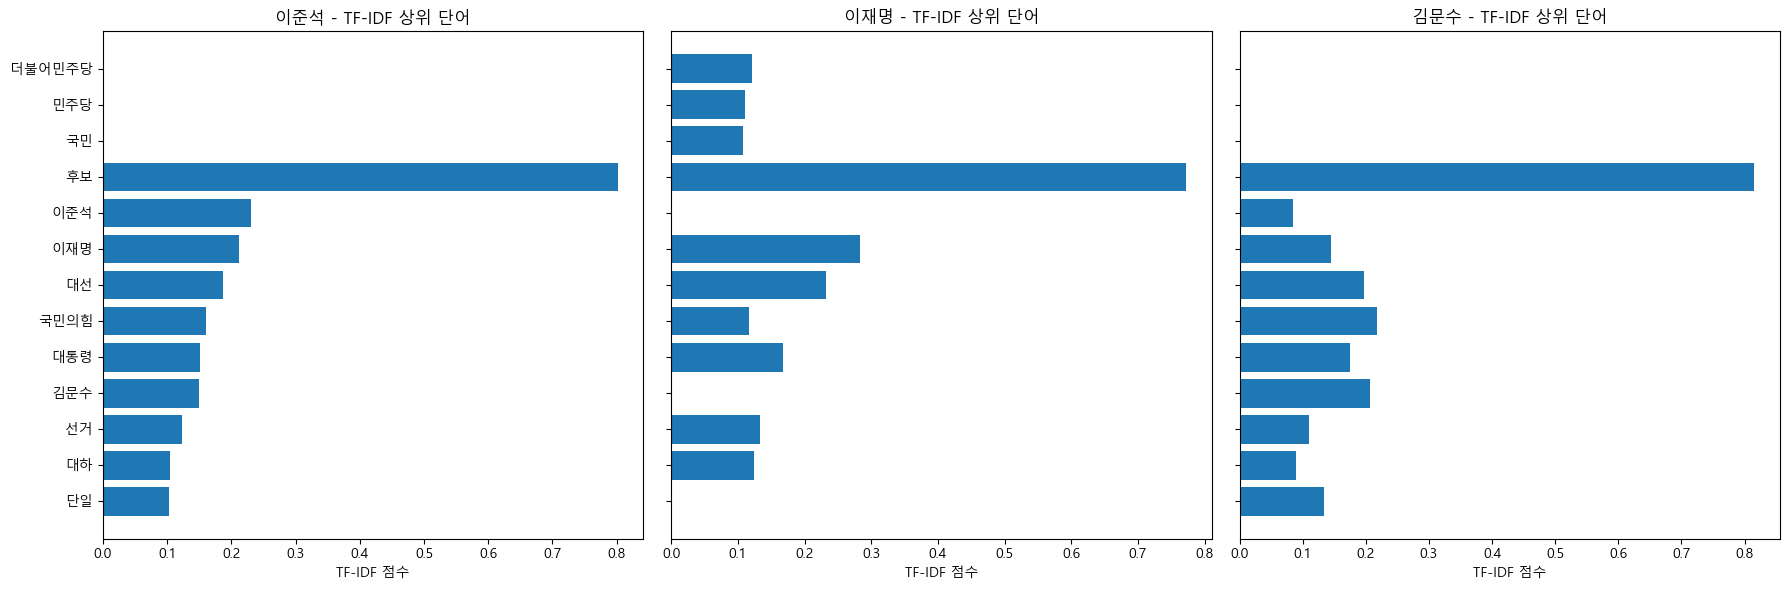

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 분석할 파일 목록
file_paths = {
    "이준석": "lee_junseok_tagged_filtered_ver2.csv",
    "이재명": "lee_jaemyung_tagged_filtered.csv",
    "김문수": "kim_moonsu_tagged_filtered.csv"
}


documents = {}

# 파일별로 텍스트 추출
for name, path in file_paths.items():
    df = pd.read_csv(path)
    docs = []
    for sentence in df['tagged'].dropna():
        tokens = []
        for token in sentence.split():
            if '(' in token and ')' in token:
                word = token.rsplit("(", 1)[0]
                tokens.append(word)  # ✅ 이 줄이 필수!
        docs.append(" ".join(tokens))
    documents[name] = " ".join(docs)

# TF-IDF 분석
corpus = list(documents.values())
names = list(documents.keys())
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf.index):
    top_terms = df_tfidf.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()


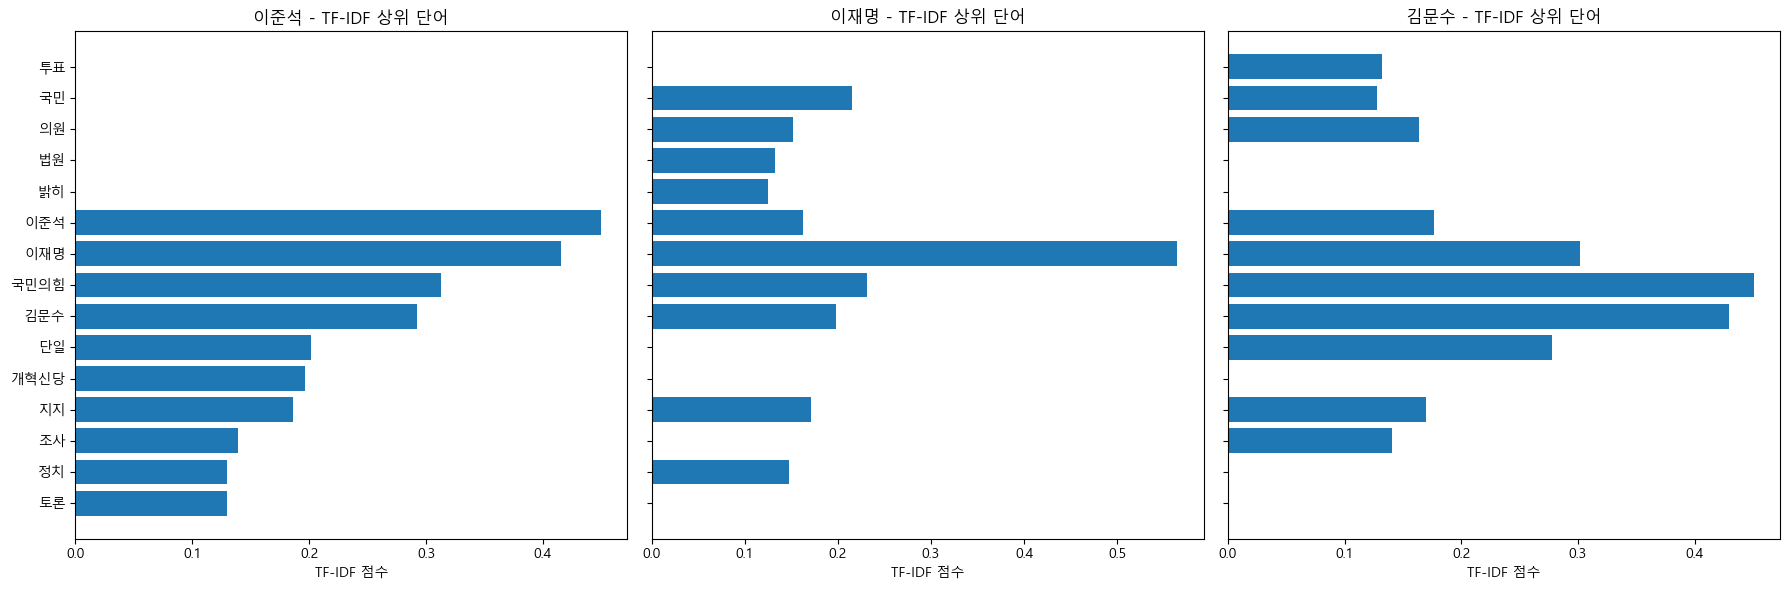

In [5]:
# 공통 단어들 제거
corpus2 = list(documents.values())
names2 = list(documents.keys())

from sklearn.feature_extraction.text import TfidfVectorizer

# 사용자 정의 불용어 리스트
custom_stopwords = ['더불어민주당', '민주당', '후보', '대선', '대통령', '선거', '후보', '대하', '아니', '이날', '위하']

# TF-IDF 벡터라이저 정의
vectorizer = TfidfVectorizer(max_features=100, stop_words=custom_stopwords)
X = vectorizer.fit_transform(corpus)

# 이후 코드는 동일
df_tfidf2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf2.index):
    top_terms = df_tfidf2.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()

In [17]:
# 고유 키워드 추출
## 특정 정치인에게만 특이하게 높은 TF-IDF를 보이는 단어를 구분

# 기존 TF-IDF 결과가 담긴 DataFrame: df_tfidf2
# 각 행: 정치인 이름, 각 열: 단어+품사 조합, 값: TF-IDF 점수

# 고유 키워드: 특정 정치인에서만 TF-IDF가 유독 높은 단어
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(10))




이준석의 고유 키워드:
이준석     0.279688
개혁신당    0.131334
토론      0.080531
공약      0.040473
tv      0.040075
토론회     0.036658
단일      0.028215
여성      0.017273
보수      0.016929
정책      0.016902
dtype: float64

이재명의 고유 키워드:
이재명    0.206019
법원     0.115675
사건     0.106611
국민     0.104645
재판     0.084427
선거법    0.060280
내란     0.053174
발언     0.035000
정치     0.034307
만들     0.033051
dtype: float64

김문수의 고유 키워드:
김문수     0.183971
국민의힘    0.178140
단일      0.142887
한덕수     0.070814
경선      0.063294
투표      0.059423
의원      0.047681
사전      0.025039
오후      0.020464
만나      0.017916
dtype: float64


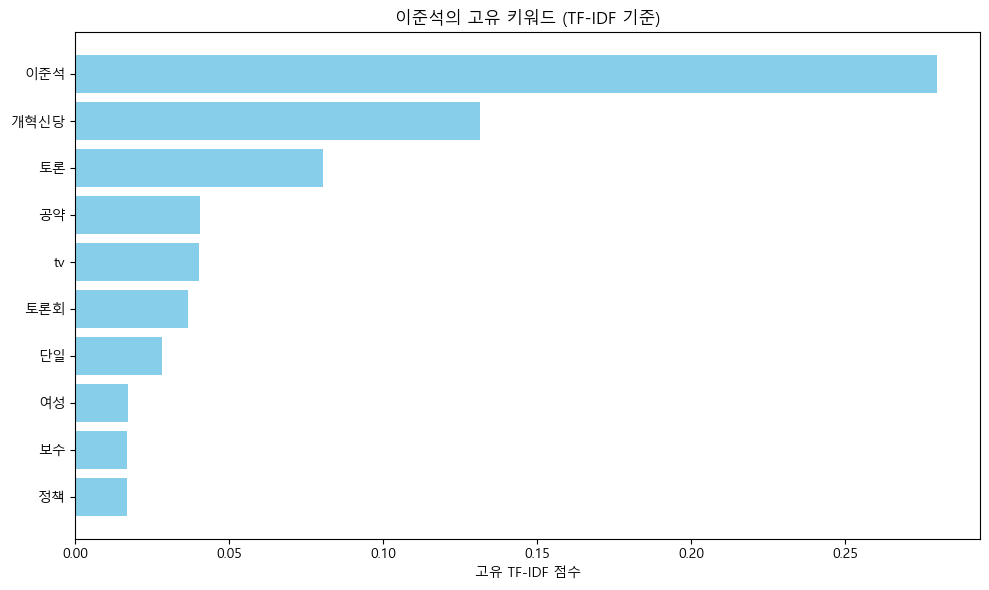

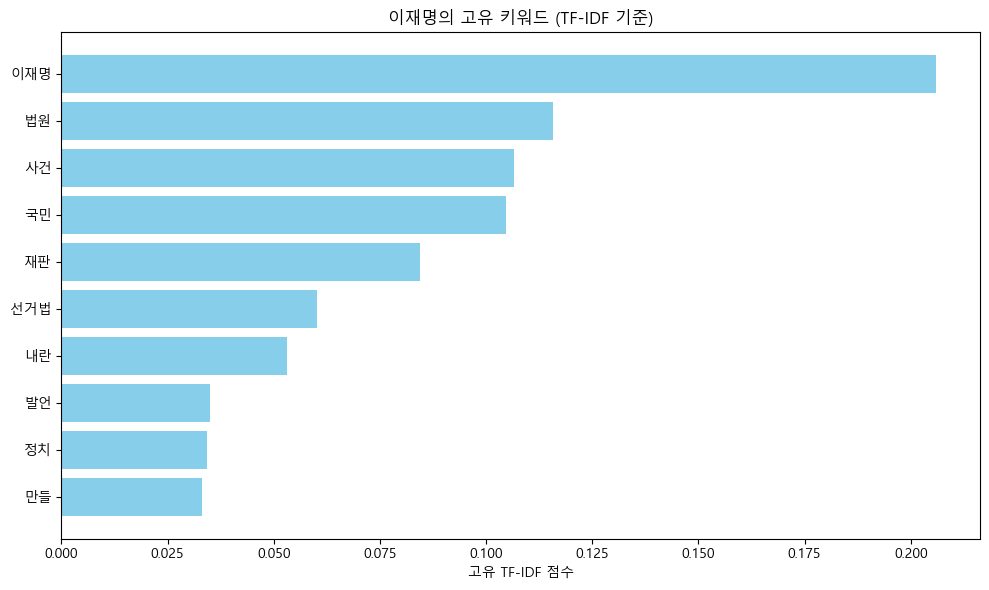

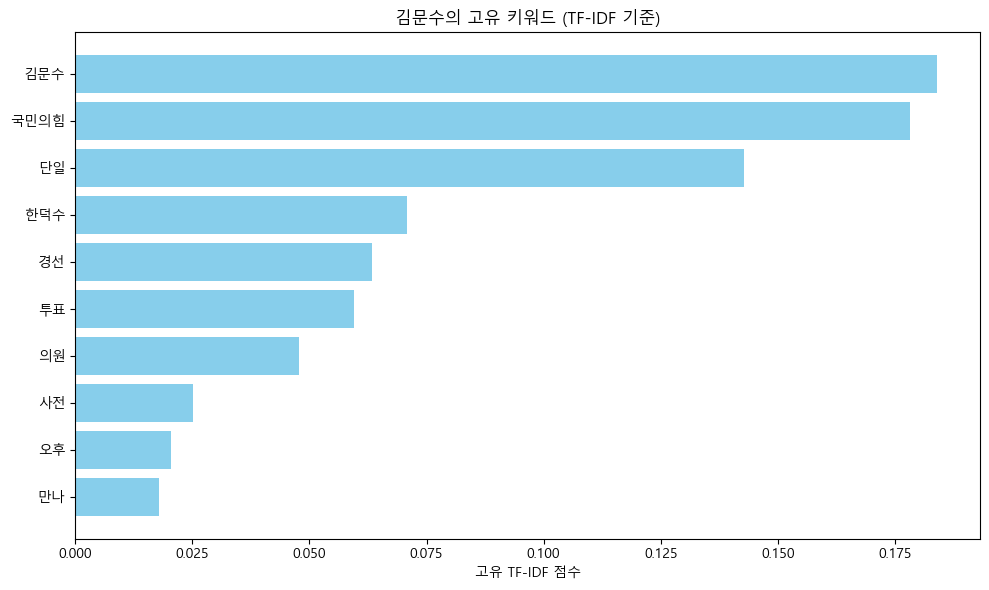

In [18]:
# 고유 키워드 시각화

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 10개
for name in df_tfidf2.index:
    # 고유성 계산: 해당 정치인의 TF-IDF - (다른 정치인 평균)
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    top_dominant = dominant_words.sort_values(ascending=False).head(10)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


이준석의 고유 키워드:
이준석     0.279688
개혁신당    0.131334
토론      0.080531
공약      0.040473
tv      0.040075
토론회     0.036658
단일      0.028215
여성      0.017273
보수      0.016929
정책      0.016902
지지      0.015646
경제      0.012142
사회      0.010918
질문      0.009674
정치      0.008270
dtype: float64

이재명의 고유 키워드:
이재명    0.206019
법원     0.115675
사건     0.106611
국민     0.104645
재판     0.084427
선거법    0.060280
내란     0.053174
발언     0.035000
정치     0.034307
만들     0.033051
통합     0.032796
지역     0.031422
밝히     0.030278
의원     0.029525
따르     0.025836
dtype: float64

김문수의 고유 키워드:
김문수     0.183971
국민의힘    0.178140
단일      0.142887
한덕수     0.070814
경선      0.063294
투표      0.059423
의원      0.047681
사전      0.025039
오후      0.020464
만나      0.017916
탄핵      0.015898
윤석열     0.015734
여론      0.015693
위원장     0.014393
대책      0.012824
dtype: float64


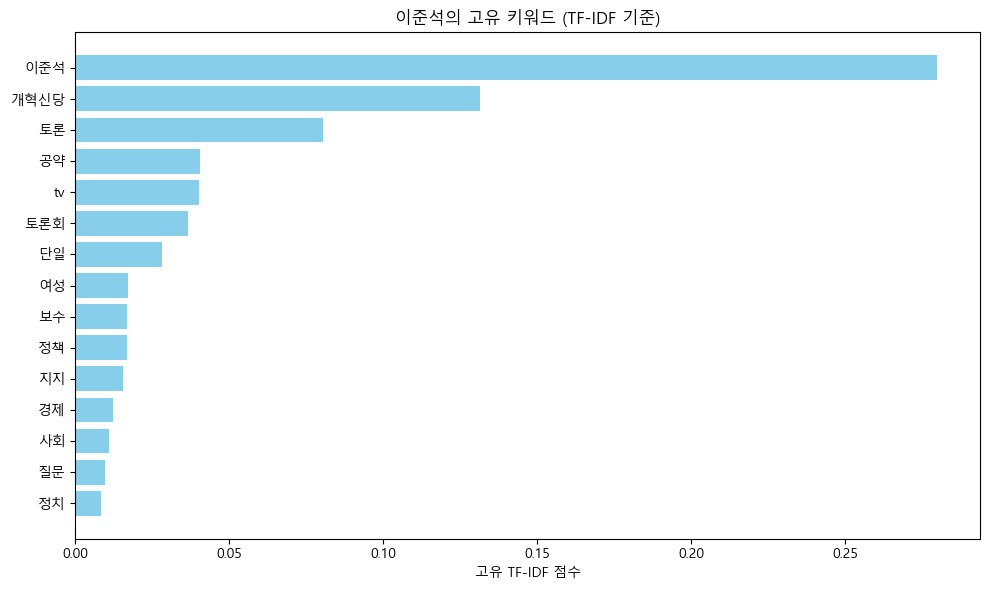

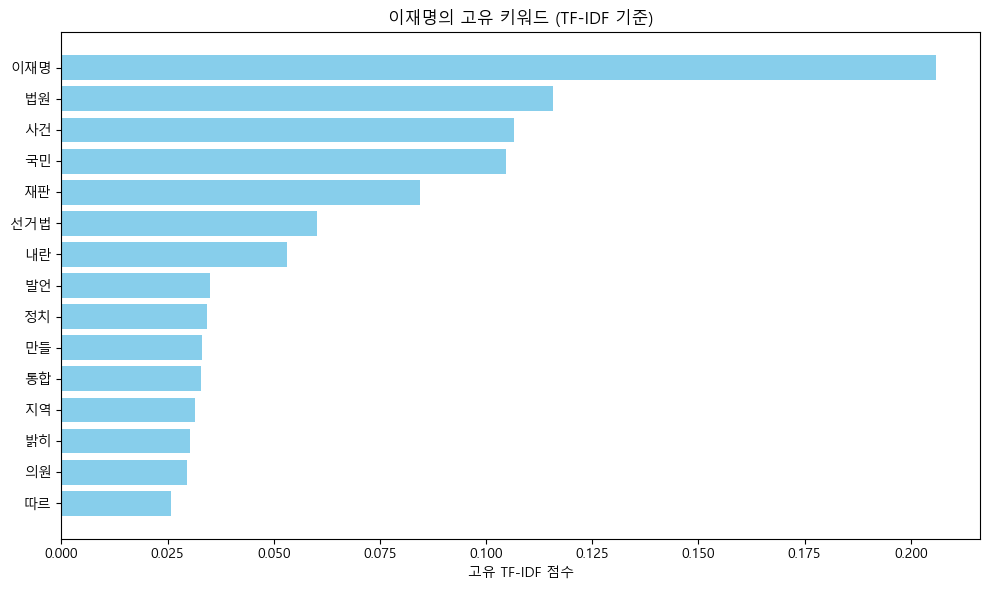

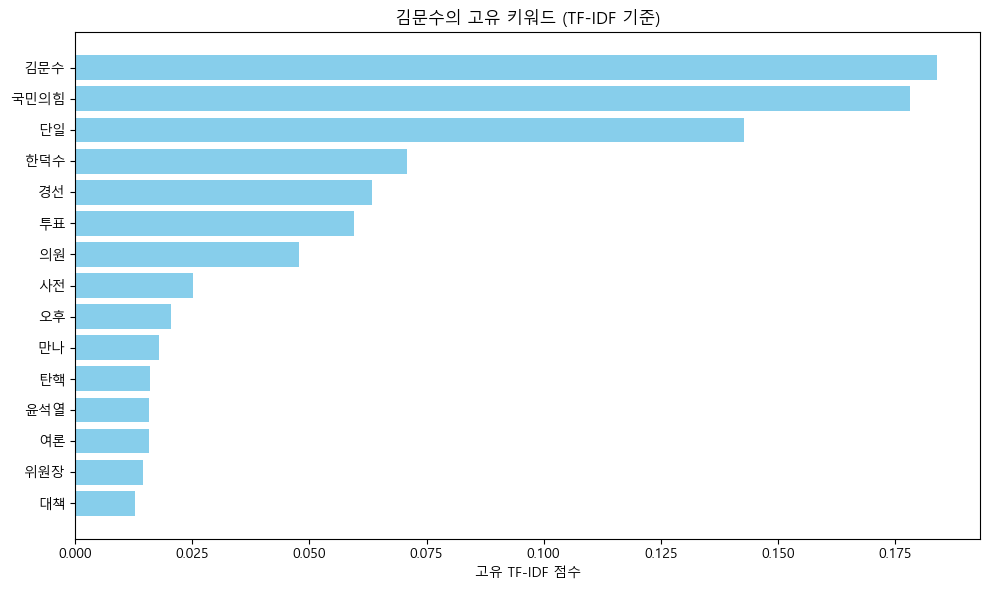

In [22]:
# 사용자 정의 불용어 설정
custom_stopwords = {"이런", "그런"}

# 고유 키워드 추출 (15개)
for name in df_tfidf2.index:
    # TF-IDF 점수에서 다른 후보 평균을 뺀 값 → 고유성 점수
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # 불용어 제거
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    # 상위 15개 고유 키워드 출력
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(15))

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 15개
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # ✅ 여기에도 불용어 제거 적용!
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    top_dominant = dominant_words.sort_values(ascending=False).head(15)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()
